In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
from pymatgen.io.cif import CifParser,CifWriter
import numpy as np
from pymatgen.core import Lattice

def transform(a_reduce=0.87,angle=-180,phi=0,move=0.93):
    parser = CifParser("../data/dipoles1.cif")
    structure = parser.get_structures()[0]
    coord = structure.cart_coords[3]+structure.cart_coords[5]+structure.cart_coords[6]+structure.cart_coords[8]
    coord=coord/4
    coord[2]=coord[2]*move
    new_a=structure.lattice.a*a_reduce

    structure.rotate_sites([3,5,6,8],np.deg2rad(angle),[0,1,0],coord)
    
    structure.rotate_sites([3,5,6,8],np.deg2rad(phi),[1,0,0],coord)
    structure

    #print structure
    lattice = Lattice.from_parameters(a=new_a, b=structure.lattice.b, c=structure.lattice.c, alpha=90,
                                      beta=structure.lattice.beta, gamma=90)
    # structure.modify_lattice(lattice)
    structure.lattice = lattice
    return structure


In [3]:
def get_atoms(theta,phi):
    s=transform(a_reduce=0.87,angle=theta,phi=phi,move=0.93)

    ge1=[]
    for i in s.get_neighbors_in_shell(s[2].coords,1,1.4):
        if i.species_string in ["Cl","Ge"]:
            ge1.append(i.coords)
        
    ge2=[]
    for i in s.get_neighbors_in_shell(s[3].coords,1,1.4):
        if i.species_string in ["Cl","Ge"]:
            ge2.append(i.coords)
        
    ge1=np.array(ge1)
    ge2=np.array(ge2)
    return ge1,ge2,s

def plot_tetra(theta,phi,ax):
    
    ge1,ge2,s=get_atoms(theta,phi)
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
    
    ax.set_box_aspect(s.lattice.abc)
    vertices = [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]
    for atom in [ge1,ge2]:
        poly3d = [[atom[vertices[ix][iy]] for iy in range(3)] for ix in range(4)]
        ax.scatter(atom.T[0][:-1],atom.T[1][:-1],atom.T[2][:-1],c="b")
        ax.scatter(atom.T[0][-1],atom.T[1][-1],atom.T[2][-1],c="g")
        ax.add_collection3d(Poly3DCollection(poly3d, edgecolors='k', facecolors='r', linewidths=1, alpha=0.9))
    
    
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    for line in ax.xaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.yaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.zaxis.get_ticklines():
        line.set_visible(False)
    

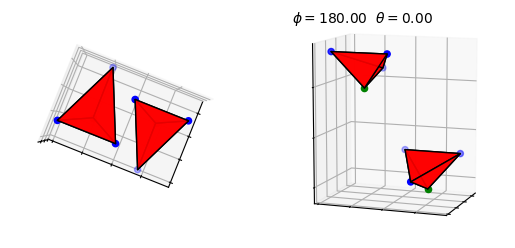

In [14]:
theta=0
phi=180
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
plot_tetra(theta,phi,ax)
ax.view_init(elev=90., azim=20)

ax = fig.add_subplot(122, projection='3d')
plot_tetra(theta,phi,ax)
ax.view_init(elev=10., azim=20)

ax.text2D(0.05, 0.95, f"$\phi={phi:.2f}$  $\\theta={theta:.2f}$", transform=ax.transAxes)
plt.show()

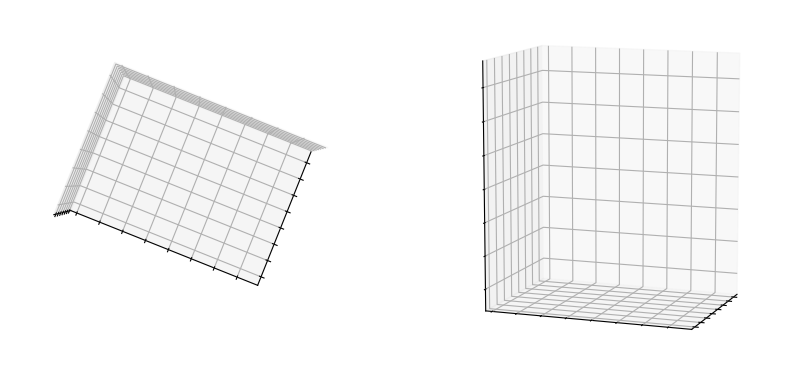

In [17]:
from celluloid import Camera
import numpy as np

fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='3d'))
camera = Camera(fig)

for phi in np.linspace(0,360,20):
    theta=0
    plot_tetra(theta,phi,ax[0])
    ax[0].view_init(elev=90., azim=20)

    plot_tetra(theta,phi,ax[1])
    ax[1].view_init(elev=10., azim=20)
    for i in ax:
        i.text2D(0.05, 0.95, f"$\phi={phi:.2f}$  $\\theta={theta:.2f}$", transform=i.transAxes)
    camera.snap()
    
for phi in np.linspace(0,360,20):
    theta=180
    plot_tetra(theta,phi,ax[0])
    ax[0].view_init(elev=90., azim=20)

    plot_tetra(theta,phi,ax[1])
    ax[1].view_init(elev=10., azim=20)
    for i in ax:
        i.text2D(0.05, 0.95, f"$\phi={phi:.2f}$  $\\theta={theta:.2f}$", transform=i.transAxes)
    camera.snap()
    
for theta in np.linspace(0,360,20):
    phi=0
    plot_tetra(theta,phi,ax[0])
    ax[0].view_init(elev=90., azim=20)

    plot_tetra(theta,phi,ax[1])
    ax[1].view_init(elev=10., azim=20)
    for i in ax:
        i.text2D(0.05, 0.95, f"$\phi={phi:.2f}$  $\\theta={theta:.2f}$", transform=i.transAxes)
    camera.snap()
    
animation = camera.animate()

animation.save('../figures/animation.gif')